<a href="https://colab.research.google.com/github/kauecapellato/Titanic_Case/blob/main/Titanic_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Neste projeto analisaremos um conjunto de dados com informações de passageiros do Titanic. Os dados podem ser baixados do site do Kaggle: https://www.kaggle.com/c/titanic/data

Os dados de treino contém 891 entradas e 12 features com informações de diversos passageiros do navio.

Nosso objetivo é desenvolver e avaliar o desempenho de um modelo preditivo de sobreviventes ao desastre, começando pela abertura dos dados, análise descritiva das variáveis, criação de insights e a modelagem preditiva de classificação.

#Importando as bibliotecas para a manipulação e visualização dos dados

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import files

#Carregando os dados e criando um Dataframe

Foi fornecido pelo site do Kaggle 3 arquivos: dados de treino, teste e como o arquivo final deveria parecer. A partir disso, criaremos um dataframe com os dados de treino para melhor visualização e análise das variáveis.  

A partir dos dados baixados do site em formato csv, criaremos um dataframe para facilitar a visualização e a manipulação dos dados mais para frente.

In [57]:
# Realizamos o upload dos arquivos necessários
files.upload()


Saving dados_teste.csv to dados_teste (1).csv
Saving dados_treino.csv to dados_treino (1).csv


{'dados_teste.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr

In [58]:
# Criando o Dataframe
treino = pd.read_csv('dados_treino.csv')
teste = pd.read_csv('dados_teste.csv')

# Formato do Dataframe
print("---Treino---")
print("Linhas: ", treino.shape[0])
print("Colunas: ", treino.shape[1])
print()
print("---Teste---")
print("Linhas: ", teste.shape[0])
print("Colunas: ", teste.shape[1])

---Treino---
Linhas:  891
Colunas:  12

---Teste---
Linhas:  418
Colunas:  11


Assim, obervamos que o conjunto de dados de treino possui 891 observações e 12 variáveis, enquanto o de teste possui 418 obervações com 11 variáveis.
Para saber quais são essas variáveis, executamos:

In [59]:
# Variáveis do dataset - Treino
print("Variáveis - Treino: ")
print(treino.keys())
print()

# Variáveis do dataset - Teste
print("Variáveis - Teste: ")
print(teste.keys())

Variáveis - Treino: 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Variáveis - Teste: 
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Abaixo explicamos melhor o que cada variável significa.

##Informações sobre as variáveis

1.   **Número de casos:** 891


2.   **Variáveis (12 atributos):**

* PassengerId - Identificação do passageiro
* Survived - Variável dicotômica: 1 - Sobreviveu e 0 - Não sobreviveu
* Pclass - Classe no ticket do passageiro
* Name - Nome do passageiro
* Sex - Sexo
* Age - Idade em anos do passageiro
* SibSp - Número de irmãos abordo
* Parch - Número de pais abordo
* Ticket - Número do ticket
* Fare - Taxa da passagem
* Cabin -Número da cabine
* Embarked - Local de embarque: C = Cherbourg, Q = Queenstown, S = Southampton


#####**Algumas notas sobre as variáveis:**

**pclass:** Status Socio-Econômico (SSE)

1ª = Classe alta

2ª = Classe Média

3ª = Classe baixa


**age:** A idade é fracionária caso seja menor que 1. Se for estimada, então será da forma xx.5

**sibsp:** O Dataset define as relações familiares da seguinte forma:

Irmãos = irmão, irmã, meio-irmão, meia-irmã

Cônjugues = marido, esposa (noivas e noivos foram ignorados)

**parch:** O Dataset define as relações familiares da seguinte forma:

Pais = mãe, pai

Crianças = filha, filho, enteada, enteado

Algumas crianças apenas estavam acompanhadas da babá, então parch=0 para elas.

#Análise Exploratória dos Dados

Para a criação de um modelo, é fundamental conhecer bem as variáveis presentes no Dataset. Nessa seção, faremos uma obervação dos dados e uma breve análise de possíveis variáveis correlacionadas. 

In [60]:
# Primeiras 15 linhas do Dataframe
treino.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Com essa primeira obervação de parte do dataset, percebe-se que as variáveis 'PassengerId', 'Survived', 'PClass', 'SiBsp' e 'Parch' assumem valores discretos, sendo confirmado nos tipos dos dados abaixo. Além disso, a variável que representa se o passageiro sobreviveu ou não ao desastre é dicotômica (assume apenas 2 valores, 0 ou 1 nesse caso), assim como a que representa o sexo do passageiro, porém é categórica.

Ademais, nota-se a ausência de alguns valores (*missing values*) nas variáveis 'Age' e 'Cabin', podendo influenciar na atuação do nosso modelo.


In [61]:
# Tipos dos dados 
treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Para uma melhor descrição do Dataframe, utilizaremos o método *describe* do pandas.

In [62]:
# Descrevendo o Dataframe
treino.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


A partir da descrição acima, podemos ter uma ideia sobre as distribuições das variáveis.

Primeiramente, vale-se obervar a quantidade de cada variável. Como foi dito acima, percebeu-se a ausência de alguns valores na variável 'Age', o que confirma-se dado que o número de suas observações foi o menor.

Quanto aos percentis, na variável 'Age', por exemplo, podemos ver que cerca de 75% dos passageiros têm até 38 anos, ou seja, muitas pessoas jovens estavam no navio. Além disso, para essa mesma variável, a média se aproxima da mediana(percentil 50), dando alguma ideia de maior concentração dos dados em torno da média. Para a variável 'Fare', o valor máximo é muito superior ao percentil 75 (ou 3° quartil), fornecendo uma ideia da presença de *outliers* (valores discrepantes).

##Visualização das variáveis

Para a visualização das variáveis, ou seja, a criação de gráficos, utilizaremos as bibliotecas matplotlib e seaborn. Nosso objetivo é conhecer o comportamento de tais variáveis junto com suas distribuições. Comecemos olhando a matriz de correlação das *features* para depois analisar algumas dessas variáveis.

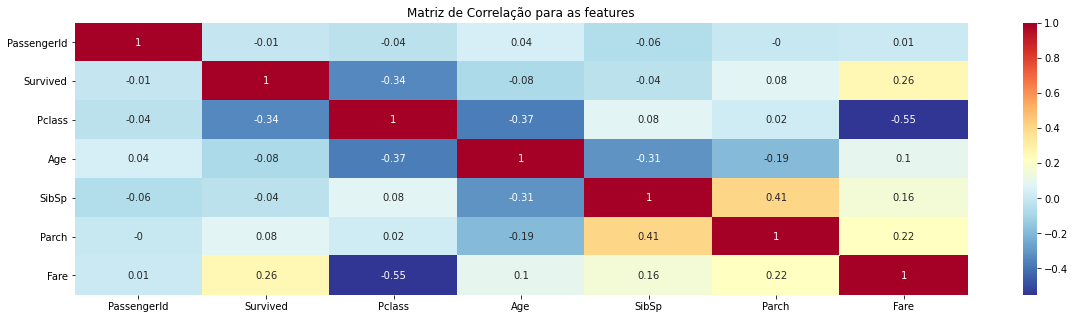

In [63]:
# Matriz de correlação - heatmap
matriz_cor = treino.corr().round(2)
plt.figure(figsize=(20,5))
sns.heatmap(matriz_cor, annot = True, cmap = 'RdYlBu_r')
plt.title("Matriz de Correlação para as features")
plt.show()

Com a matriz acima podemos destacar algumas features, tais como 'Fare', 'Age', 'Pclass', 'Parch', 'Survived' e 'SibSp', que apresentaram uma correlação considerável. Veremos o comportamento delas e relacionadas entre si abaixo.

##Variáveis categóricas

### Sobreviventes ('Survived'):

A primeira variável a ser analisada é a 'Survived', a variável *dummy*, e que representa a quantidade de sobreviventes ao desastre do Titanic. Por ser uma variável dicotômica (assume apenas 2 valores), o *dataset* definiu como 0 quem não sobreviveu e 1 quem sobreviveu ao desastre.

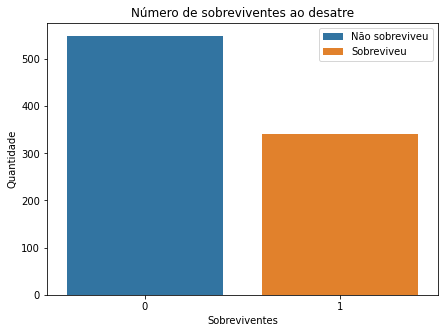

In [64]:
# Quantidade de sobreviventes ao desastre
plt.figure(figsize = (7,5))
sns.countplot(x = 'Survived', hue = 'Survived', data = treino, dodge = False)
plt.title("Número de sobreviventes ao desatre")
plt.legend(['Não sobreviveu', 'Sobreviveu'])
plt.xlabel("Sobreviventes")
plt.ylabel("Quantidade")
plt.show()

E a quantidade exata em total e frequência:

In [65]:
# A quantidade exata de sobreviventes:
print("Quantidade de sobreviventes\n")
print("Quantidade")
print(treino['Survived'].value_counts())
print()
print("Frequência")
# A quantidade de sobreviventes em frequência:
print(treino["Survived"].value_counts(normalize = True))

Quantidade de sobreviventes

Quantidade
0    549
1    342
Name: Survived, dtype: int64

Frequência
0    0.616162
1    0.383838
Name: Survived, dtype: float64


Assim, temos que para o nosso conjunto de dados inteiro, aproximadamente 61,61% dos passageiros não sobreviveram e 38,39% sobreviveram ao desastre

###Sexo ('Sex')


Vejamos como é a distribuição dos sexos dos passageiros. 

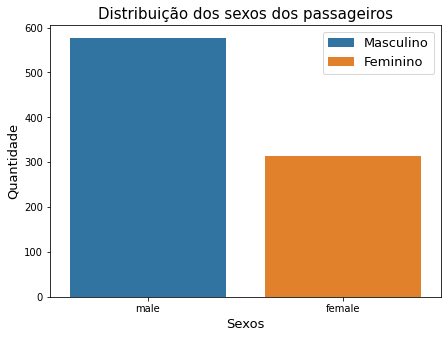

In [66]:
# Countplot de homens e mulheres presentes
plt.figure(figsize = (7,5))
sns.countplot(x = 'Sex', hue = 'Sex', data = treino, dodge = False)
plt.title("Distribuição dos sexos dos passageiros", size = 15)
plt.legend(['Masculino', 'Feminino'], prop={'size': 13})
plt.xlabel("Sexos", size = 13)
plt.ylabel("Quantidade", size = 13)
plt.show()

E a quantidade exata e relativa:

In [67]:
# A quantidade exata de homens e mulheres:
print("Quantidade de homens e mulheres\n")
print("Quantidade")
print(treino['Sex'].value_counts())
print()
print("Frequência")
# Frequência:
print(treino["Sex"].value_counts(normalize = True))

Quantidade de homens e mulheres

Quantidade
male      577
female    314
Name: Sex, dtype: int64

Frequência
male      0.647587
female    0.352413
Name: Sex, dtype: float64


Assim podemos obervar que mais homens estavam presentes na embarcação naquele dia.

###Classe socio-econômica ('Pclass')

Olharemos agora para a variável 'Pclass' que representa a classe social do passageiro, sendo que 1 representa classe alta, 2 classe média e 3 classe baixa.

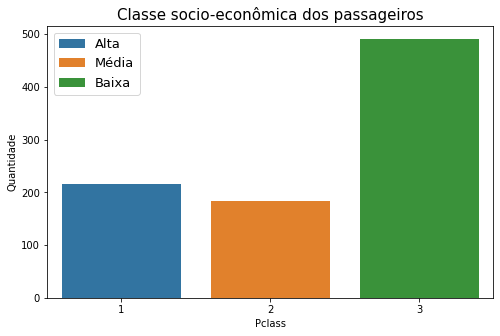

In [68]:
# Countplot
plt.figure(figsize = (8,5))
sns.countplot(x = 'Pclass', hue = 'Pclass', data = treino, dodge = False)
plt.title("Classe socio-econômica dos passageiros", size = 15)
plt.ylabel("Quantidade")
plt.legend(['Alta', 'Média', 'Baixa'], prop={'size': 13})
plt.show()

E em valores totais e relativos:

In [69]:
# A quantidade exata de cada classe:
print("Quantidade de passageiros por classe\n")
print("Quantidade")
print(treino['Pclass'].value_counts())
print()
print("Frequência")
# Frequência:
print(treino["Pclass"].value_counts(normalize = True))

Quantidade de passageiros por classe

Quantidade
3    491
1    216
2    184
Name: Pclass, dtype: int64

Frequência
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


Com os números acima podemos perceber que a maior parte das pessoas a bordo eram de classe baixa, seguidos pelos passageiros de classe média e por úlyimo os de classe alta.

Agora analisaremos como essas variáveis se relacionam com as outras. 

###Sobreviventes ('Survived')  x  Sexo ('Sex'):

Ainda sobre essas variáveis e relacionando com variáveis categóricas como sexo e a classe social do passageiro, podemos ter informações mais específicas sobre os sobreviventes do desastre.

Primeiramente, olhemos a relação das variáveis 'Survived' e 'Sex'.

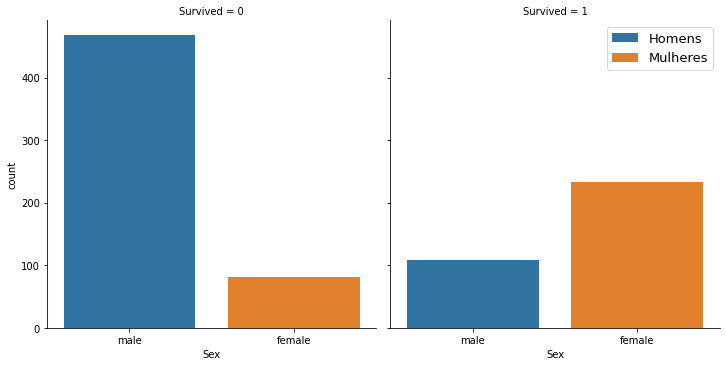

In [70]:
sns.catplot(x = "Sex", hue="Sex", col = 'Survived', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['Homens', 'Mulheres'], prop={'size': 13})
plt.show()

Obervamos claramente dessa maneira que mais homens não sobreviveram ao desastre enquanto que mais mulheres sobreviram. Para saber com exatidão, criaremos um Dataframe com a quantidade de sobreviventes por sexo:

In [71]:
# Determinando por sexo e se sobreviveu ou não
homens_n = len(treino[(treino.Sex == 'male') & (treino.Survived == 0)])
mulheres_n = len(treino[(treino.Sex == 'female') & (treino.Survived == 0)])
homens_s = len(treino[(treino.Sex == 'male') & (treino.Survived == 1)])
mulheres_s = len(treino[(treino.Sex == 'female') & (treino.Survived == 1)])

# Criando um dicionário com os valores acima
dados = {'Homem': [homens_n/891, homens_s/891, (homens_n + homens_s)/891],
         'Mulher': [mulheres_n/891, mulheres_s/891, (mulheres_n + mulheres_s)/891],
         'Mulher x Mulher': [mulheres_n/(mulheres_n + mulheres_s), mulheres_s/(mulheres_n + mulheres_s), 1],
          'Homem x Homem': [homens_n/(homens_n + homens_s), homens_s/(homens_n + homens_s), 1]}

# Criando um Dataframe com o dicionário
sobreviventes = pd.DataFrame(dados, columns = ['Homem', 'Mulher','Mulher x Mulher', 'Homem x Homem'], index = ['Não sobreviveu', 'Sobreviveu', 'Total'])
print('Frequencia:')  
sobreviventes

Frequencia:


,Homem,Mulher,Mulher x Mulher,Homem x Homem
Não sobreviveu,0.525253,0.090909,0.257962,0.811092
Sobreviveu,0.122334,0.261504,0.742038,0.188908
Total,0.647587,0.352413,1.000000,1.000000


Com esta tabela podemos ter uma melhor visualização sobre quem sobreviveu a partir da comparação sobre a feature sexo.
Lembrando que do total de pessoas dentro do navio de acordo com o arquivo treino, mais ou menos 65% eram homens. Dos homens que morreram, a representatividade deles pelo total de pessoas incluindo mulheres é de 52%.
Mas ainda podemos extrair mais informações desta tabela, podemos perceber que pelo dado de treino, 81% dos homens que estavam a bordo não conseguiram sobreviver.

###Sobreviventes ('Survived') x Classe social ('Pclass'):

Agora, analisaremos as relações das variáveis 'Survived' e 'Class', para ter uma ideia dos sobreviventes e suas condições sociais.

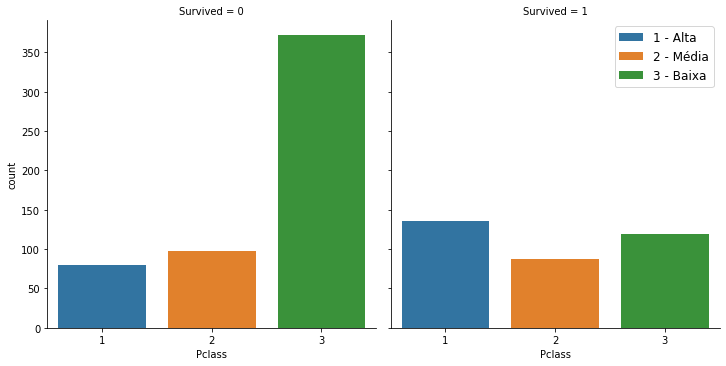

In [72]:
sns.catplot(x = "Pclass", hue="Pclass", col = 'Survived', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['1 - Alta', '2 - Média', '3 - Baixa'], prop={'size': 12})
plt.show()

Com o gráfico de barras acima podemos observar que dos passageiros que não sobreviveram, a maioria era de um *status* social menor (classe baixa) seguidos daqueles de classe média e por fim os de classe alta, que foram os que mais sobreviveram. Abaixo podemos olhar melhor para os números daqueles que sobreviveram ou não com sua classe social.

In [73]:
# Determinando por classe social e se sobreviveu ou não
classe_n = []
classe_s = []

# Loop pelas classes e aqueles que não sobreviveram
for i in range(1, 4):
  classe_n.append(len(treino[(treino.Pclass == i) & (treino.Survived == 0)]))

# Loop pelas classes e aqueles que sobreviveram
for i in range(1, 4):
  classe_s.append(len(treino[(treino.Pclass == i) & (treino.Survived == 1)]))

# Criando um dicionário com os valores acima
dados = {'Alta': [classe_n[0], classe_s[0], (classe_s[0] + classe_n[0])],
         'Média': [classe_n[1], classe_s[1], (classe_s[1] + classe_n[1])],
         'Baixa': [classe_n[2], classe_s[2], (classe_s[2] + classe_n[2])],
         'Total': [sum(classe_n), sum(classe_s), len(treino.Pclass)]}

# Criando um Dataframe com o dicionário
sobreviventes_classes = pd.DataFrame(dados, columns = ['Alta', 'Média', 'Baixa', 'Total'], index = ['Não sobreviveu', 'Sobreviveu', 'Total'])  
sobreviventes_classes

,Alta,Média,Baixa,Total
Não sobreviveu,80,97,372,549
Sobreviveu,136,87,119,342
Total,216,184,491,891


###Classe social ('Pclass') x Sexo ('Sex'):

Agora, analisaremos como as classes sociais se distribuem com os sexos.

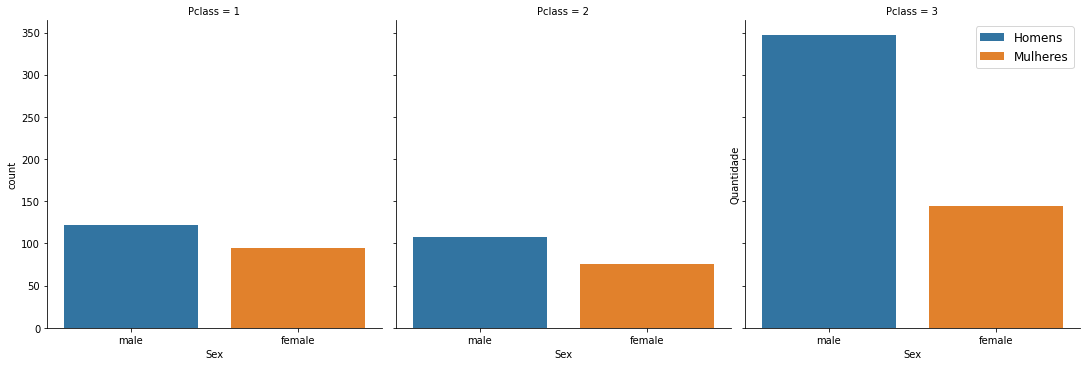

In [74]:
sns.catplot(x = "Sex", hue="Sex", col = 'Pclass', data = treino, kind = "count", dodge = False, height=5, aspect=1)
plt.legend(['Homens', 'Mulheres'],prop={'size': 12})
plt.show()

Oberservamos que haviam muitos passageiros de classe baixa no navio e maioria era homem. Seguidos das pessoas de classe alta e por último aqueles de classe média. Em todas as classes, a quantidade de homens é superior ao número de mulheres.

Agora olhemos uma tabela com os resultados dos números exatos do *dataset*.

In [75]:
# Determinando por classe social e sexo
classe_h = []
classe_m = []

# Loop pelas classes e aqueles que são homens
for i in range(1, 4):
  classe_h.append(len(treino[(treino.Pclass == i) & (treino.Sex == 'male')]))

# Loop pelas classes e aqueles que são mulheres
for i in range(1, 4):
  classe_m.append(len(treino[(treino.Pclass == i) & (treino.Sex== 'female')]))

# Criando um dicionário com os valores acima
dados = {'Alta': [classe_h[0], classe_m[0], (classe_h[0] + classe_m[0])],
         'Média': [classe_h[1], classe_m[1], (classe_h[1] + classe_m[1])],
         'Baixa': [classe_h[2], classe_m[2], (classe_h[2] + classe_m[2])],
         'Total': [sum(classe_h), sum(classe_m), len(treino.Pclass)]}

# Criando um Dataframe com o dicionário
classes_sex = pd.DataFrame(dados, columns = ['Alta', 'Média', 'Baixa', 'Total'], index = ['Homem', 'Mulher', 'Total'])  
classes_sex

,Alta,Média,Baixa,Total
Homem,122,108,347,577
Mulher,94,76,144,314
Total,216,184,491,891


Com a tabela acima podemos ter uma ideia mais exata da quantidade de homens e mulheres por classe social presentes no navio e confirmar o que observamos no gráfico anterior. Vele notar que a classe "baixa" é predominante tanto no sexo masculino quanto no feminino.


##Variáveis Numéricas

Como primeira variável numérica, iremos analisar a variável 'Age', que é uma variável contínua e representa a idade dos passageiros em anos.

###Idade ('Age'):

Comecemos plotando um histograma para essa variável.

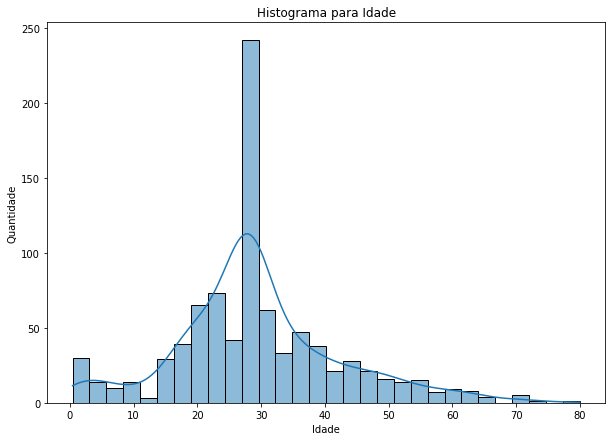

In [109]:
# Plotando histograma para variável contínua 'Age'
plt.figure(figsize = (10,7))
sns.histplot(x = treino['Age'], kde = True)
plt.title("Histograma para Idade")
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

No histograma acima utilizamos o kde (kernel density estimator) para estimar a função de densidade para esse histograma. Para mais informações descritivas podemos agora plotar um *boxplot*.

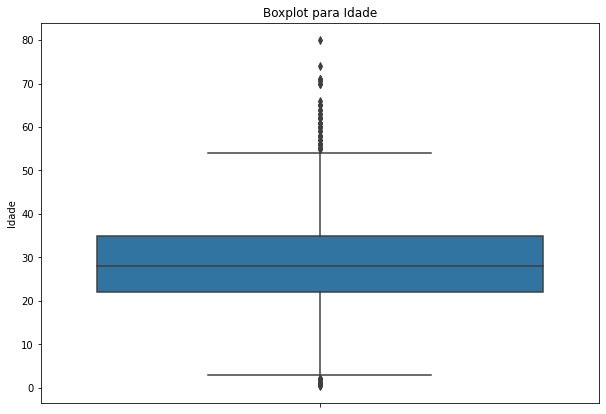

In [110]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Age', data = treino)
plt.title("Boxplot para Idade")
plt.ylabel('Idade')
plt.show()

Aplicando o método *describe()* para essa variável:

In [111]:
print("Descrição da variável 'Age'", '\n')
treino['Age'].describe()

Descrição da variável 'Age' 



count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Com o boxplot e a descrição temos muitas informações importantes sobre essa variável. Por exemplo, podemos confirmar o que dissemos acima sobre a maioria das pessoas serem jovens como pode-se perceber pelos quartis, com uma idade média de 29 anos. Além disso, como 75% dos passageiros tem até 40 anos, idades muito superiores foram vistas como *outliers* (valores discrepantes).

Além disso, exitem 177 *missing values* que poderão ser substituídos pela mediana das observações na hora de treinar o modelo.

###Valor da passagem ('Fare'):

Agora analisemos os valores de cada passagem.

<Figure size 720x504 with 0 Axes>

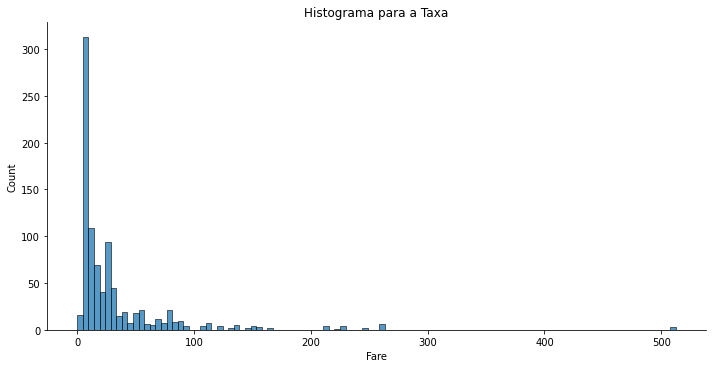

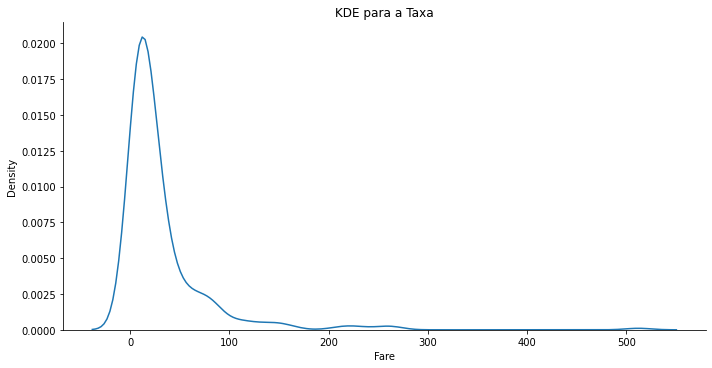

In [112]:
# Histrograma
plt.figure(figsize = (10,7))
sns.displot(x = treino['Fare'], aspect = 2, kind = 'hist')
plt.title("Histograma para a Taxa")
sns.displot(x = treino['Fare'], aspect = 2, kind = 'kde')
plt.title("KDE para a Taxa")
plt.show()

Através do histograma e sua suavização com o kde, pode-se notar uma grande assimetria à direita. Além da presença de valores de passagens muito distantes em relação à maior concentração dos dados. Podemos conferir isso com o boxplot abaixo assim como a descrição dessa variável. 

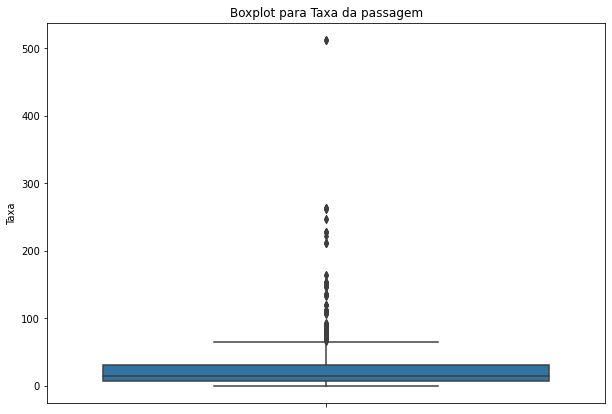

In [113]:
# Boxplot
plt.figure(figsize = (10, 7))
sns.boxplot(y = 'Fare', data = treino)
plt.ylabel("Taxa")
plt.title("Boxplot para Taxa da passagem")
plt.show()

E, utilizando o método *describe()*:




In [114]:
treino['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Assim, confirmamos o que foi dito acima, cerca de 75% das observações têm até 31.0 libras (valor da época) como preço da passagem, valor este que está próximo da média, porém o valor máximo das obervações foi de 512.3292 libras, reforçando a visão inicial da presença de outliers. Além de visualmente grande parte dos dados estarem abaixo da taxa de 100 libras, o que percebe-se também pelos quantis da variável.


###Idade ('Age')  vs  Taxa ('Fare'):

Agora veremos se a idade parece ter alguma relação com a taxa da passagem, para isso usaremos um *scatterplot* e depois calcularemos o coeficiente de correlação de Pearson.

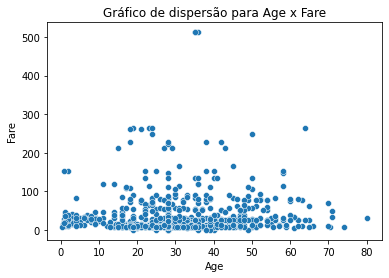

In [115]:
# Scatterplot
sns.scatterplot(x = 'Age', y = 'Fare', data = treino)
plt.title("Gráfico de dispersão para Age x Fare")
plt.show()

Visualmente as duas variáveis parecem não serem correlacionadas. Podemos confirmar isso com o coeficiente de Pearson:

In [116]:
print('Correlação de Pearson: ', round(treino.corr()['Age']['Fare'], 4))

Correlação de Pearson:  0.0967


Como a correlação é um valor muito pequeno, as variáveis Idade ('Age') e Taxa ('Fare') não são correlacionadas.

##Variáveis Categóricas x Variáveis Numéricas

Agora faremos algumas análises sobre as relações entre algumas variáveis categóricas e numéricas.

###Sobreviventes ('Survived') x Idade ('Age')

Comecemos analisando se o fato do passageiro ter sobrevivido tem alguma relação com as idades dos mesmos. Para isso utilizaremos um histograma e um *boxplot*.

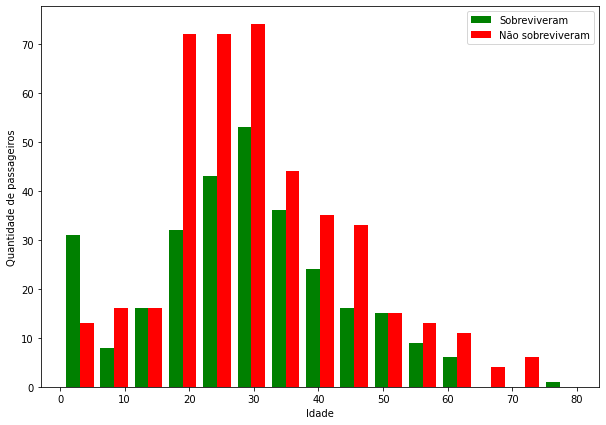

In [84]:
figure = plt.figure(figsize=(10,7))

# Histograma com 2 barras, uma sobre os sobreviventes e outra com os que não sobreviveram
plt.hist([treino[treino['Survived'] == 1]['Age'], treino[treino['Survived'] == 0]['Age']], bins=15, label=['Sobreviveram','Não sobreviveram'], color = ['g','r'])
plt.legend()
plt.xlabel('Idade')
plt.ylabel('Quantidade de passageiros')
plt.show()

Com o histograma da variável 'Survived' agrupado pelas idades, percebe-se que pessoas mais jovens tendem a sobreviver mais que pessoas mais velhas. Agora, observemos o boxplot sobre essas duas variáveis. 

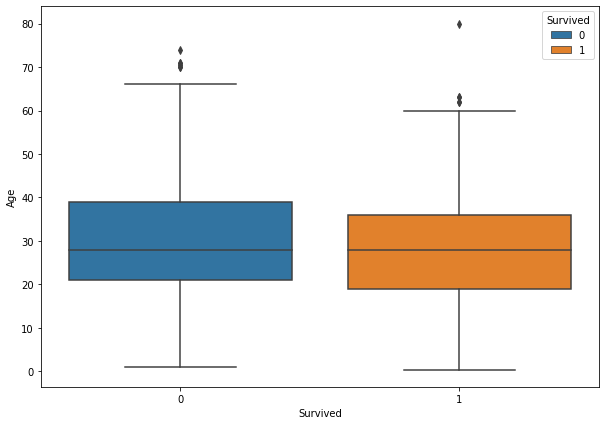

In [85]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Age', x = 'Survived', hue = 'Survived', dodge = False, data = treino)
plt.show()

###Classe social ('Pclass') x Idade ('Age')

Analisaremos agora as variáveis que representam a classe social dos passageiros com a idade dos mesmos. 

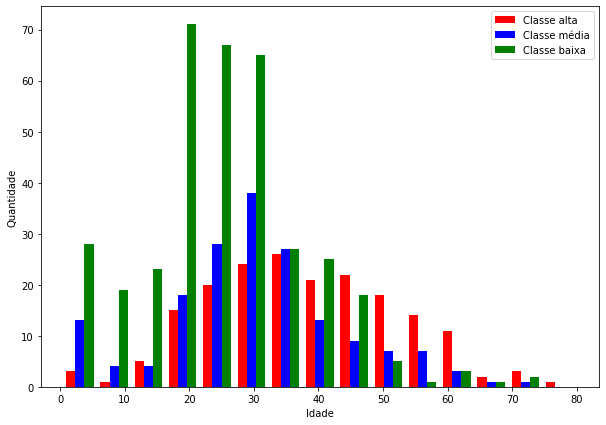

In [86]:
figure = plt.figure(figsize=(10,7))

# Histograma com 3 barras ( 3 classes sociais) com idades
plt.hist([treino[treino['Pclass'] == 1]['Age'], treino[treino['Pclass'] == 2]['Age'], treino[treino['Pclass'] == 3]['Age']], bins=15, label=['Classe alta','Classe média', 'Classe baixa'], color = ['r','b','g'])
plt.legend()
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

Com o histograma das idades separado pelas classes acima, percebemos que a grande maioria das pessoas de até 30 anos eram de classe baixa, seguidos pelos de classe média, por sua vez, os passageiros com mais de 40 anos, em sua maioria, eram de classe alta. 

###Classe social ('Pclass') x Taxa ('Fare')

Analisaremos agora como o preço da passagem se relaciona com a classe socio-econômica dos passageiros.

##Análise Reflexiva

Aqui iremos fazer uma analise não causal, com conhecimento, sociologico, historico sobre o acontecemineto, e teorizar sobre as relações de algumas features.

* **Sobreviventes x Sexo** Lembrando que nas analises obtivemos que 81% dos homens que estavam a bordo não conseguiram sobreviver e já com as mulheres quase o oposto por volta de 74% sobreviveram. Com base em analogias de como era a sociedade e de relatos historicos, as mulheres eram prioridades para salvar junto com as crianças o que faz sentido, pois em meio ao pânico generalizado, a maioria dos homens ficaram no navio enquanto crianças e mulheres entravam nos botes, o que por certo não houve tempo para a maioria dos homens embacardos conseguir abandonar o navio.   





#Modelagem

##*Missing Values*:

###Dados de treino

Agora faremos as mudanças necessárias para a construção do modelo de classificação. 

Primeiramente, vale salientar a presença de valores *missing* no conjunto de dados. Veremos em quais variáveis abaixo.

In [87]:
# Quantidade de missing values
treino.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Criando um *dataframe* com o total e as frequências dos valores faltantes:

In [88]:
# Criando um dataframe com os valores faltantes e suas respectivas frequências 
totalage, total1 = treino['Age'].isna().sum(), len(treino.Age)
totalcabin, total2 = treino['Cabin'].isna().sum(), len(treino.Cabin)
totalemb, total3 = treino['Embarked'].isna().sum(), len(treino.Embarked)

data = {'Total': [totalcabin, totalage, totalemb] , 'Frequência (%)': [(totalcabin/total2)*100, (totalage/total1)*100, (totalemb/total3)*100]}
dataframe_treino = pd.DataFrame(data, index = ['Cabin', 'Age', 'Embarked'], columns = ['Total', 'Frequência (%)'])

print("DataFrame com as quantidades totais e relativas de valores faltantes - Conjunto de Treino: ")
dataframe_treino

DataFrame com as quantidades totais e relativas de valores faltantes - Conjunto de Treino: 


,Total,Frequência (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Criando um gráfico de barras para facilitar a visualização:

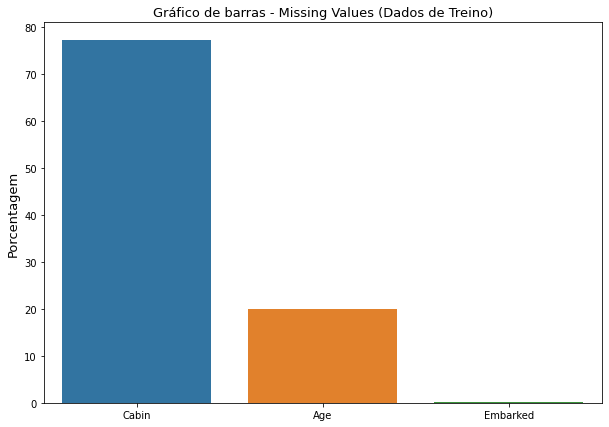

In [89]:
plt.figure(figsize = (10,7))
sns.barplot(x = dataframe_treino.index, y = dataframe_treino['Frequência (%)'])
plt.title("Gráfico de barras - Missing Values (Dados de Treino)", size = 13)
plt.ylabel("Porcentagem", size = 13)
plt.show()

Assim, podemos perceber que para as variáveis 'Age' e 'Cabin', a ausência de valores é muito considerável. Para isso, para a variável 'Age', que é uma variável numérica contínua, trataremos substituindo tais valores pela mediana das observações, uma vez que pela presença de outliers, a média seja afetada.

In [90]:
# Inputando a mediana nos valores que estão faltando
treino['Age'] = treino['Age'].fillna(value = treino['Age'].median())
print("Número de missing values (Dados de Treino): ", treino['Age'].isna().sum())

Número de missing values (Dados de Treino):  0


Para a variável 'Cabin', que é uma variável categórica, faremos o *input* utilizando o método get_dummies() do pandas.

In [91]:
# Dados de treino
treino_no_name = treino.drop(columns = ["Name"])
treino['Cabin'] = treino_no_name['Cabin'].isna()
treino = pd.get_dummies(treino_no_name)

# Parte do novo dataframe de treino após o método get_dummies()
treino.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,Ticket_111240,Ticket_111320,Ticket_111361,Ticket_111369,Ticket_111426,Ticket_111427,Ticket_111428,Ticket_112050,Ticket_112052,Ticket_112053,Ticket_112058,Ticket_112059,Ticket_112277,Ticket_112379,Ticket_113028,Ticket_113043,Ticket_113050,Ticket_113051,Ticket_113055,Ticket_113056,Ticket_113059,Ticket_113501,Ticket_113503,Ticket_113505,Ticket_113509,Ticket_113510,...,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


###Dados de teste

Agora, vamos verificar a presença de valores *missing* no conjunto de dados de teste.

In [92]:
# Quantidade de missing values - Teste
teste.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Percebemos que, diferentemente dos dados treino, os dados de teste apresentam uma variável diferente com *missing value*, que é a variável que representa o valor da passagem ('Fare').

Colocando em um *DataFrame*:

In [93]:
# Criando um dataframe com os valores faltantes e suas respectivas frequências 
totalage, total1 = teste['Age'].isna().sum(), len(teste.Age)
totalcabin, total2 = teste['Cabin'].isna().sum(), len(teste.Cabin)
totalemb, total3 = teste['Fare'].isna().sum(), len(teste.Fare)

data = {'Total': [totalcabin, totalage, totalemb] , 'Frequência (%)': [(totalcabin/total2)*100, (totalage/total1)*100, (totalemb/total3)*100]}
dataframe_teste = pd.DataFrame(data, index = ['Cabin', 'Age', 'Fare'], columns = ['Total', 'Frequência (%)'])

print("DataFrame com as quantidades totais e relativas de valores faltantes - Conjunto de Teste: ")
dataframe_teste

DataFrame com as quantidades totais e relativas de valores faltantes - Conjunto de Teste: 


,Total,Frequência (%)
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


E o gráfico de barras:

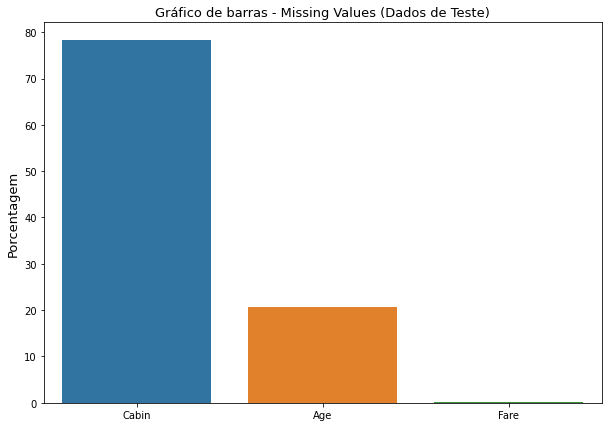

In [94]:
# Gráfico de barras - Dados de teste
plt.figure(figsize = (10,7))
sns.barplot(x = dataframe_teste.index, y = dataframe_teste['Frequência (%)'])
plt.title("Gráfico de barras - Missing Values (Dados de Teste)", size = 13)
plt.ylabel("Porcentagem", size = 13)
plt.show()

Do mesmo modo que para as variáveis 'Age' e 'Cabin' para os dados de treino, nota-se a ausência de valores. Assim, para a variável 'Age', trataremos substituindo tais valores pela mediana novamente.

In [95]:
# Inputando a mediana nos valores que estão faltando
teste['Age'] = teste['Age'].fillna(value = teste['Age'].median())
print("Número de missing values (Dados de Teste): ", teste['Age'].isna().sum())

Número de missing values (Dados de Teste):  0


Tratando a variável categórica 'Cabin' com o mesmo método utilizado nos dados de treino:

In [96]:
# Dados de teste
teste_no_name = teste.drop(columns = ["Name"])
teste['Cabin'] = teste_no_name['Cabin'].isna()
teste = pd.get_dummies(teste_no_name)

# Parte do novo dataframe de teste após o método get_dummies()
teste.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110469,Ticket_110489,Ticket_110813,Ticket_111163,Ticket_112051,Ticket_112058,Ticket_112377,Ticket_112378,Ticket_112901,Ticket_113038,Ticket_113044,Ticket_113054,Ticket_113059,Ticket_113503,Ticket_113509,Ticket_113773,Ticket_113778,Ticket_113780,Ticket_113781,Ticket_113790,Ticket_113791,Ticket_113795,Ticket_113796,Ticket_113801,Ticket_11753,Ticket_11765,Ticket_11767,Ticket_11769,Ticket_11770,Ticket_11778,Ticket_11813,Ticket_1222,...,Cabin_C62 C64,Cabin_C7,Cabin_C78,Cabin_C80,Cabin_C85,Cabin_C86,Cabin_C89,Cabin_C97,Cabin_D,Cabin_D10 D12,Cabin_D15,Cabin_D19,Cabin_D21,Cabin_D22,Cabin_D28,Cabin_D30,Cabin_D34,Cabin_D37,Cabin_D38,Cabin_D40,Cabin_D43,Cabin_E31,Cabin_E34,Cabin_E39 E41,Cabin_E45,Cabin_E46,Cabin_E50,Cabin_E52,Cabin_E60,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Agora podemos continuar com o desenvolvimento do modelo de classificação.

## A Regressão Logística

Como modelo de predição, foi escolhida a regressão logística. Modelo este que é formado pela função sigmóide e difere da regressão linear no sentido em que apenas aceita valores contidos na imagem em (0,1).

Iremos criar uma variável para as *features* e outra para a ser a *target*.

In [97]:
# Dropamos a target
features = treino.drop(columns = ['Survived'])
target = treino['Survived']

Separando dados de treino e teste com o método *train_test_split()*:

In [98]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

Vamos dar uma olhada nos formatos de cada variável acima:

In [99]:
print("X_treino: ", x_train.shape)
print("X_teste: ", x_test.shape)
print("Y_treino: ", y_train.shape)
print("Y_teste: ", y_test.shape)

X_treino:  (712, 839)
X_teste:  (179, 839)
Y_treino:  (712,)
Y_teste:  (179,)


Instânciando o modelo de regressão logística:

In [100]:
reg_log = LogisticRegression(max_iter = 10000)

Adequando os dados ao modelo acima:

In [101]:
reg_log.fit(x_train, y_train)
y_predito = reg_log.predict(x_test)

In [102]:
print("Score do modelo: ", round(reg_log.score(x_test,y_test), 6) * 100, "%")

Score do modelo:  81.5642 %


### Avaliação do modelo: Matriz de Confusão, Acurácia, Precisão e Revocação

Como maneiras de avaliar nosso modelo, utilizaremos a matriz de confusão e métricas como a acurácia, a precisão e a revocação.

###A Matriz de Confusão

Uma das formas de avaliar se nosso modelo está classificando de maneira correta os passageiros que sobreviveram e os que não sobreviveram utilizaremos a matriz de confusão (*confusion matrix*). 

A matriz de confusão basicamente contém informações sobre os valores reais e preditos pelo nosso modelo de classificação, podendo assim, verificar os valores que estamos acertando e errando. 

Além disso, podemos relacionar essa matriz com a tabela de erros feita em Testes de Hipóteses. Por exemplo, se considerarmos a probabilidade de se cometer Erro do tipo I, ou seja, a probabilidade de se rejeitar Ho (hipótese nula) quando na verdade ela é verdadeira estamos em um caso falso-positivo, que corresponderia, no nosso exemplo, ao caso em que nosso modelo classificou o passageiro como não sobrevivente quando na verdade ele sobreviveu. Para um caso do erro do tipo II, ou seja, não rejeita-se Ho quando Ho é falsa estamos em um caso falso-negativo em que o modelo previu que o passageiro sobreviveu quando na realidade ele não sobreviveu.

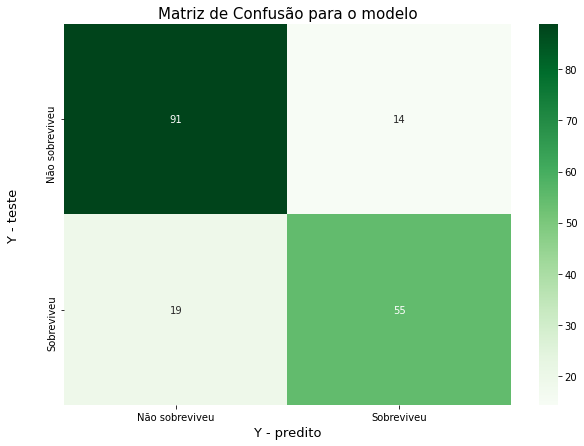

In [103]:
# Matriz de Confusão
plt.figure(figsize = (10, 7))
matriz_c = confusion_matrix(y_test, y_predito)
sns.heatmap(matriz_c, annot = True, cmap =  'Greens', xticklabels = ['Não sobreviveu', 'Sobreviveu'], yticklabels = ['\n\nNão sobreviveu', '\n\nSobreviveu'], robust = True)
plt.title("Matriz de Confusão para o modelo", size = 15)
plt.ylabel("Y - teste", size = 13)
plt.xlabel("Y - predito", size = 13)
plt.show()

A matriz acima demonstra que de todas as observações preditas, 91 acertamos, ou seja, os passageiros que não sobreviveram nos dados de teste foram corretamente classificados, a mesma coisa para os 55 que foram classificados corretamente. No entanto, 19 foram classificados erroneamente como que não sobreviveram quando na verdade eles sobreviveram e 14 foram considerados como sobreviventes quando na verdade não sobreviveram. 

Da matriz de confusão ainda conseguimos obter a acurácia, ou seja, o quão bem nosso classificador binário identifica ou exclue corretamente uma condição, ou seja, os valores preditos corretamente pelo total das observações. Assim, consideramos uma divisão na qual, no numerador, calcularemos a soma dos valores verdadeiros (verdadeiro positivo e verdadeiro negativo) e no denominador a soma de todas as observações. Então:

In [104]:
# Acurácia do nosso modelo
acuracia = (matriz_c[0][0] + matriz_c[1][1])/(np.sum(matriz_c))
print("Acurácia do modelo: ", round(acuracia * 100, 2), "%")

Acurácia do modelo:  81.56 %


Obtendo assim uma **acurácia** de aproximadamente **81,56%**.   

Outra forma de calcular essa acurácia seria utilizar a métrica *accuracy_score*, como abaixo. O resultado é idêntico ao da matriz de confusão:


In [105]:
print("Acurácia do modelo: ", round(accuracy_score(y_predito, y_test), 4) * 100, "%")

Acurácia do modelo:  81.56 %


Além disso, podemos obter a precisão:

In [106]:
# Precisão do modelo
print("Precisão do modelo: ", round(precision_score(y_test, y_predito), 3) * 100, "%")

Precisão do modelo:  79.7 %


Ou seja, obtemos uma **precisão** de **79,7%** das vezes nosso modelo prevê corretamente a sobrevivência de um passageiro.

Ainda podemos obter a revocação (*recall*), que representa a porcentagem de pessoas que o modelo previu que sobreviveram e realmente sobreviveram: 

In [107]:
# Recall do modelo
print("Recall do modelo: ", round(recall_score(y_test, y_predito), 5) * 100, "%")

Recall do modelo:  74.324 %


Obtendo um **recall** de **74,324 %**, ou seja, nosso modelo é capaz de prever que as pessoas sobreviveram e elas realmente sobreviveram em 74,324% dos casos. 

Dataframe com as predições sobre os passageiros:

In [108]:
data_rl = {"PassengerId": teste["PassengerId"], "Survived": y_test}

dataframe_final = pd.DataFrame(data_rl) 

dataframe_final['Survived'] = dataframe_final['Survived'].fillna(0)
dataframe_final['PassengerId'] = dataframe_final['PassengerId'].fillna(0)

dataframe_final

,PassengerId,Survived
0,892.0,0.0
1,893.0,0.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0
...,...,...
876,0.0,0.0
877,0.0,0.0
885,0.0,0.0
886,0.0,0.0
